In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## меры центральной тенденции

In [79]:
data = np.array([np.random.randint(150, 200) for _ in range(20)])
data

array([151, 194, 172, 196, 174, 197, 175, 189, 160, 173, 192, 165, 175,
       190, 155, 156, 191, 162, 152, 199])

In [131]:
print('simple mean:', data.mean())
print('weighted mean:', np.average(data))
print('mode:', pd.Series(data).mode().values)
print('median:', np.median(data))

simple mean: 175.9
weighted mean: 175.9
mode: [175]
median: 174.5


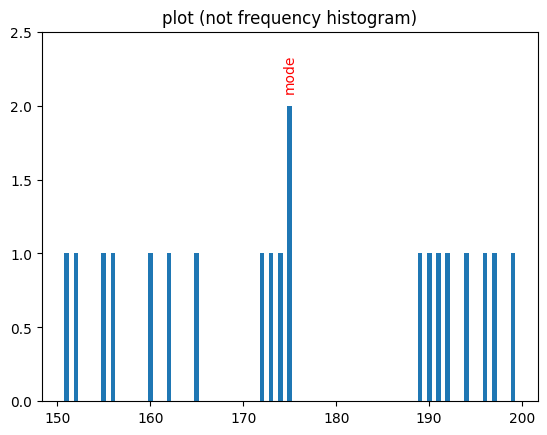

In [132]:
series = pd.Series(data)
y_points = series.value_counts()
x_points = series.value_counts().keys()

fig, ax = plt.subplots()
ax.bar(x_points, y_points, width=0.5)

ax.set_ylim(0, 2.5)
ax.set_title('plot (not frequency histogram)')

for mode in series.mode():
    y = y_points[mode]
    ax.annotate('mode', (mode, y), (mode - 0.7, y + 0.1), color='red', rotation=90)

## measures of variability

In [142]:
# выручка 20 компаний за 1 кв. 2000 года в млн. руб.
data = np.round(np.random.random_sample(20) * 1000, 2)
data

array([244.42, 731.85, 921.29,  30.56, 624.47, 453.02, 842.98,  66.81,
       610.04, 985.68, 472.85, 363.74,  49.64, 334.85, 615.79,  29.48,
       471.04, 472.18,  25.75, 767.48])

In [179]:
# дисперсия = сумма квадратов отклонений значениий от среднего, разделенного на число значений
# Если рассматривать Ген. сов-сть - делим на 20, но если выбору - делим на 20 - 1, например,
# если выборка из 20 компаний, а Ген. со-сть это все компании в России.
mean = np.average(data)
# variance of gen distrib
variance = sum((data - mean) ** 2) / len(data)
# variance of sample
# data.var(ddof=1)
print(f'Each element in distribution deviates in average on {round(pow(variance, 0.5), 2)} '
      f'mil rub from mean that is {round(mean, 2)} mil rub')
print(f'Or use std: {data.std()} mil rub')

Each element in distribution deviates in average on 302.57 mil rub from mean that is 455.7 mil rub
Or use std: 302.56657727515113 mil rub


In [181]:
# pow(np.array([15, 2, 7, 1, 9, 3, 8, 5, 9]).var(ddof=1), 0.5)
a = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])
a.std(ddof=1)

3.1622776601683795

### Квантили

In [229]:
# Квартиль - разбиваем упоряд. сов-сть на 4 части 3 точками.
data = np.arange(170, 200)
data[:15], data[15:]

(array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184]),
 array([185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199]))

177.0 184.5 192.0


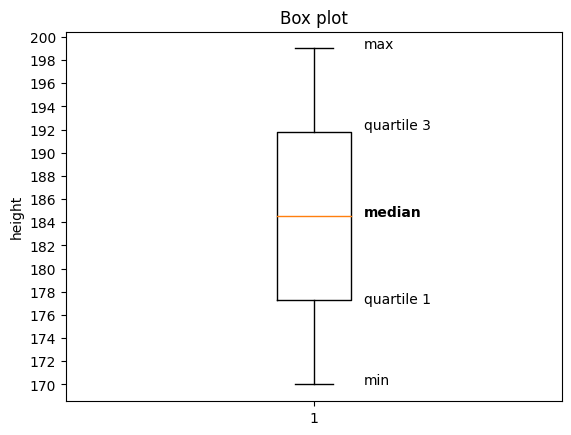

In [263]:
qt1, qt2, qt3 = 177, 184.5, 192
qt1, qt2, qt3 = (np.quantile(data, 0.25, method='hazen'), 
                 np.quantile(data, 0.5, method='hazen'),
                 np.quantile(data, 0.75, method='hazen'))
print(qt1, qt2, qt3)

fig, ax = plt.subplots()
ax.set_title('Box plot')
ax.boxplot(data)
ax.set_yticks(range(170, 201, 2))
ax.set_ylabel('height')

def make_annotation(ax: plt.Axes) -> None:
    ax.text(1+0.1, qt1, 'quartile 1')
    ax.text(1+0.1, qt2, 'median', weight='bold')
    ax.text(1+0.1, qt3, 'quartile 3')
    ax.text(1+0.1, data.min(), 'min')
    ax.text(1+0.1, data.max(), 'max')
make_annotation(ax)